# Machine Learning - K-Nearest Neighbor algorithm with python  step-by-step

#### KNN is a model that classifies data points based on that are most similar to it. it used test to make an "educated guess" on what an unclassified point should be classified as.

### Step-1: Importing the required Packages

In [81]:
import pandas as pd # data processing
from termcolor import colored as cl # elegant printing of text
import seaborn as sb # visualizations
import matplotlib.pyplot as plt # editing visualizations
import numpy as np 
from matplotlib import style # setting styles for plots
from sklearn.preprocessing import StandardScaler # normalizing data
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.metrics import accuracy_score # algorithm accuracy
from sklearn.model_selection import train_test_split # splitting the data

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (16, 7)

/tmp/ipykernel_6610/3807949764.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-whitegrid')


### Step-2: Importing Dataset and EDA( Exploratory Data Analysis)

In [82]:
# Importing Data

df = sb.load_dataset('iris')
print(cl(df, attrs = ['bold']))

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [83]:
# Data Description

print(cl(df.describe(), attrs = ['bold'],color='cyan'))

# Data Info

df.info()

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Visualization of the data using four different methods of visualization

##### (i) Scatter plot

 Sepal Scatter

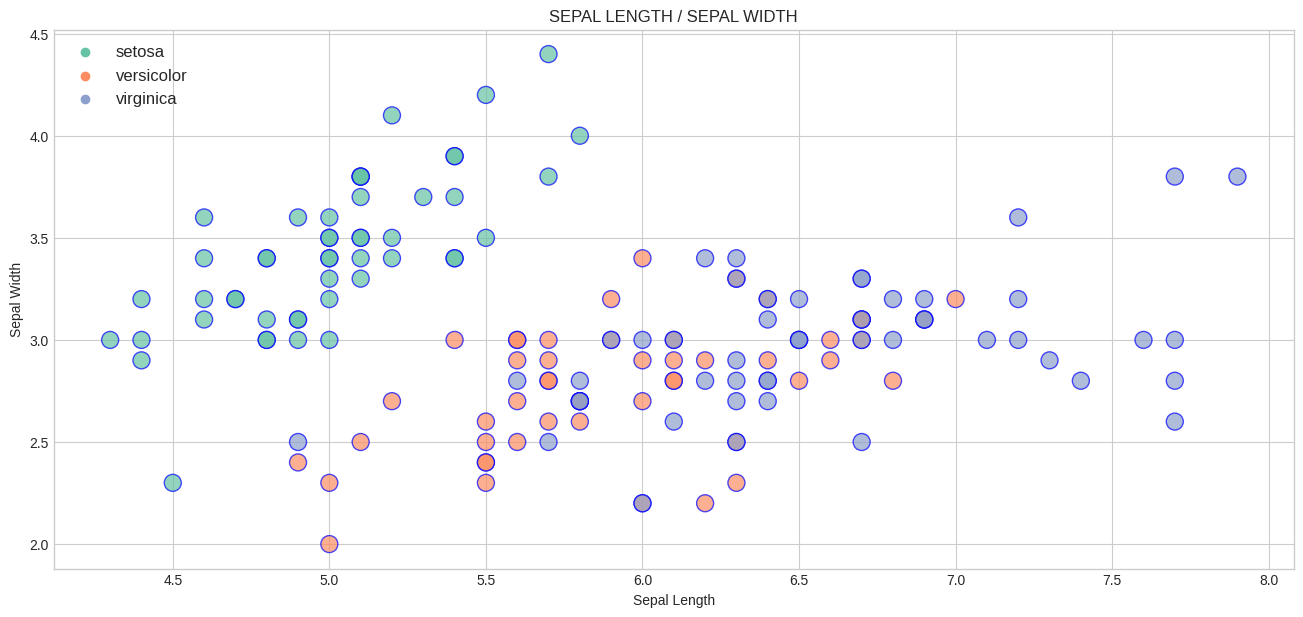

In [84]:

sb.scatterplot(x='sepal_length', y='sepal_width', data = df, hue = 'species', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('SEPAL LENGTH / SEPAL WIDTH')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc = 'upper left', fontsize = 12)
plt.savefig('sepal.png')

Petal Scatter

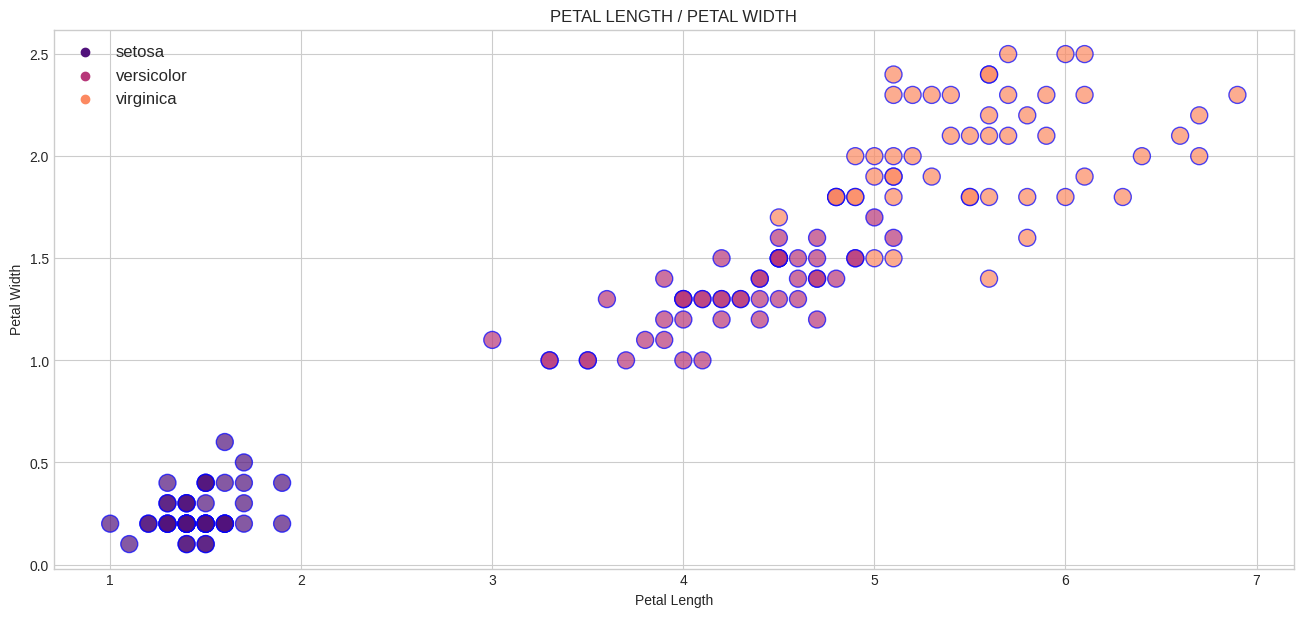

In [85]:
# 2. Petal scatter visualization

sb.scatterplot(x='petal_length', y='petal_width', data = df, hue = 'species', palette = 'magma', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('PETAL LENGTH / PETAL WIDTH')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left', fontsize = 12)
plt.savefig('petal.png')

##### (ii) Heatmap

In [87]:
# 3. Data Heatmap
df_corr = df
df_corr = df_corr.drop(columns = ['species'])
df_corr


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


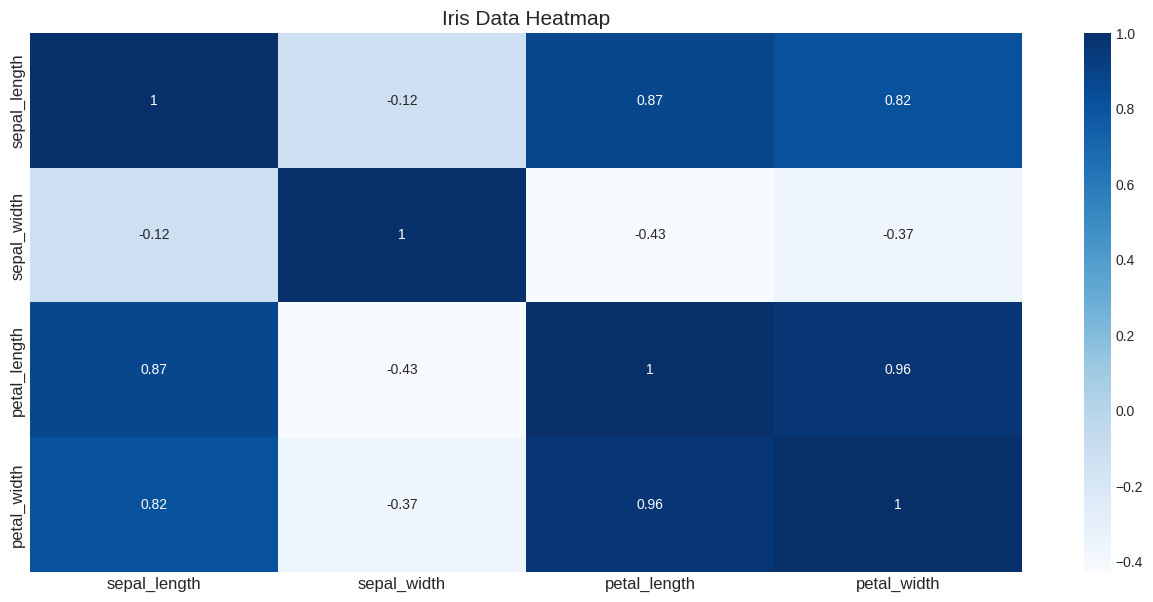

In [88]:
df_corr = df_corr.corr()

sb.heatmap(df_corr, cmap = 'Blues', annot = True, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values)
plt.title('Iris Data Heatmap', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('heatmap.png')

##### (iii) Scatter Matrix

/home/wells/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


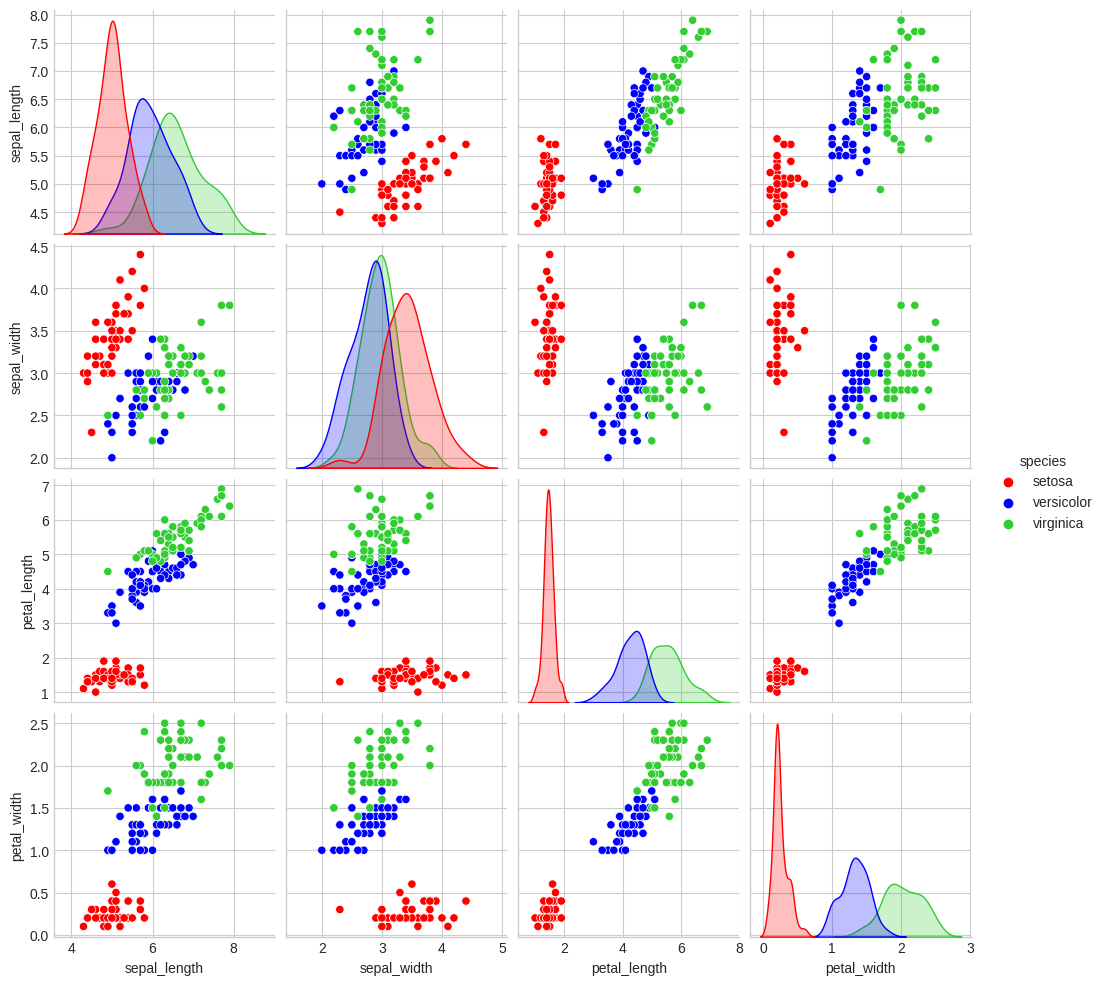

In [94]:
# 4. Scatter Matrix

sb.pairplot(data = df, hue = 'species', palette = ['Red', 'Blue', 'limegreen'])
plt.savefig('pairplot.png')

##### (iv) Distribution Plot

/tmp/ipykernel_6610/4073746668.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(df['sepal_length'], color = 'r', shade = True, label = 'Sepal Length')
/tmp/ipykernel_6610/4073746668.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(df['sepal_width'], color = 'b', shade = True, label = 'Sepal Width')
/tmp/ipykernel_6610/4073746668.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(df['petal_length'], color = 'coral', shade = True, label = 'Petal Length')
/tmp/ipykernel_6610/4073746668.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; 

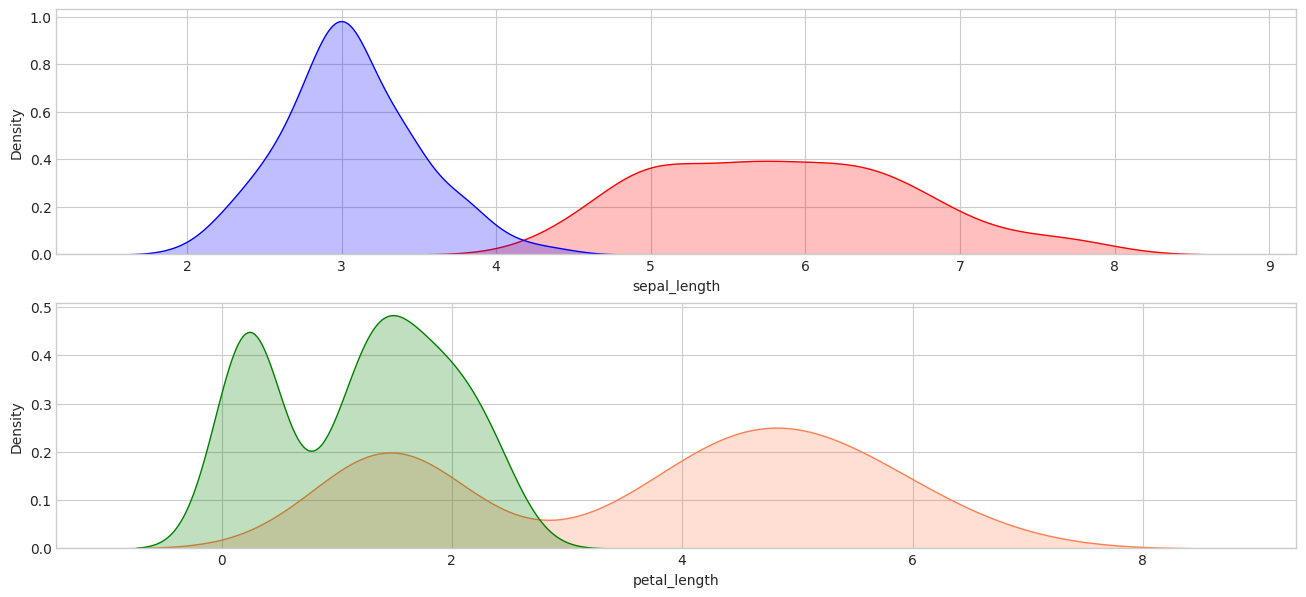

In [105]:
# 5. Distribution plot

plt.subplot(211)
sb.kdeplot(df['sepal_length'], color = 'r', shade = True, label = 'Sepal Length')
sb.kdeplot(df['sepal_width'], color = 'b', shade = True, label = 'Sepal Width')

plt.subplot(212)
sb.kdeplot(df['petal_length'], color = 'coral', shade = True, label = 'Petal Length')
sb.kdeplot(df['petal_width'], color = 'green', shade = True, label = 'Petal Width')

plt.savefig('dist.png')

/tmp/ipykernel_6610/3335384315.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(data=df, x='sepal_length', shade = True, ax=ax1, color='r', label='Sepal Length')
/tmp/ipykernel_6610/3335384315.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(data=df, x='sepal_width', shade = True, ax=ax1, color='b', label='Sepal Width')
/tmp/ipykernel_6610/3335384315.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(data=df, x='petal_length', shade = True, ax=ax2, color='coral', label='Petal Length')
/tmp/ipykernel_6610/3335384315.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will bec

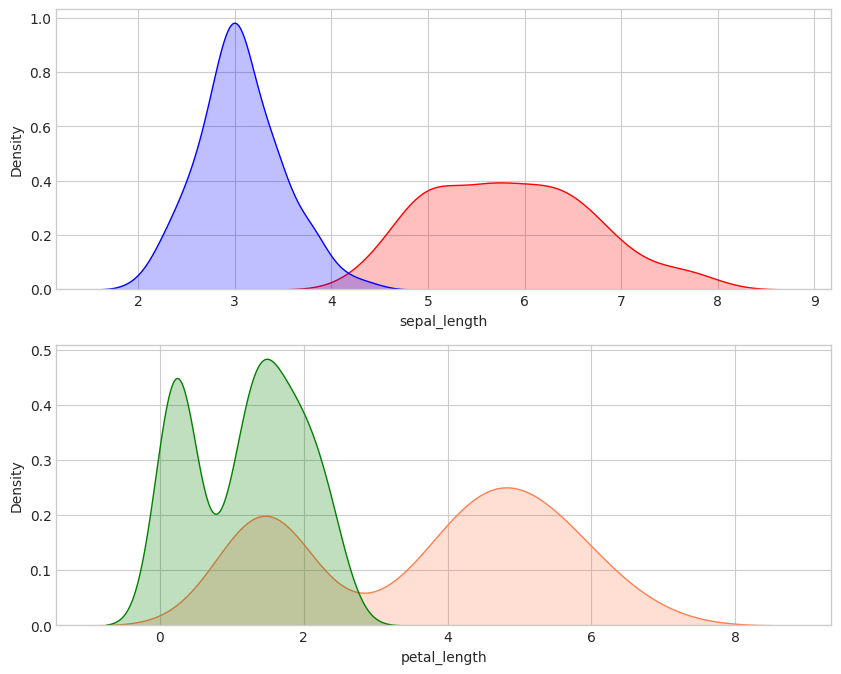

In [104]:
# 5. Distribution plot

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sb.kdeplot(data=df, x='sepal_length', shade = True, ax=ax1, color='r', label='Sepal Length')
sb.kdeplot(data=df, x='sepal_width', shade = True, ax=ax1, color='b', label='Sepal Width')

sb.kdeplot(data=df, x='petal_length', shade = True, ax=ax2, color='coral', label='Petal Length')
sb.kdeplot(data=df, x='petal_width', shade = True, ax=ax2, color='green', label='Petal Width')

plt.savefig('dist.png')


### Step-3: Building and Training the model

##### Definition of the dependent and independent variables

In [108]:
#independent variables 
X_var = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

# dependent variables
y_var = df['species'].values

print(cl('X variable :\n', attrs = ['bold']), X_var[:5])
print(cl('Y variable :\n', attrs = ['bold']), y_var[:5])

X variable :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Y variable :
 ['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


##### Data normalization

In [109]:
#Data normalization 
X_var = StandardScaler().fit(X_var).transform(X_var.astype(float))
print(cl(X_var[:5], attrs = ['bold']))

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


##### Data division

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)

print(cl('Train set shape :', attrs = ['bold']), X_train.shape, y_train.shape)
print(cl('Test set shape :', attrs = ['bold']), X_test.shape, y_test.shape)

Train set shape : (105, 4) (105,)
Test set shape : (45, 4) (45,)


##### KNN algorithm 👀

In [111]:
k = 3
#you belong to a class if your 3 closest neighbors are of that class
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train, y_train)

print(cl(neigh, attrs = ['bold']))

KNeighborsClassifier(n_neighbors=3)


In [112]:
yhat = neigh.predict(X_test)

print(cl('Prediction Accuracy Score (%) :', attrs = ['bold']), round(accuracy_score(y_test, yhat)*100, 2))


Prediction Accuracy Score (%) : 97.78
